In [36]:
import torch
import numpy as np
import tifffile

from skimage.filters import gaussian

import sys
sys.path.append('../')

from src.models import EUnet
from train import get_model, load_weights

from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
import yaml

with open('../training_configs/model/eyes_concord.yaml') as f:
    model_cfg = yaml.safe_load(f)

with open('../training_configs/checkpoint/loc_full.yaml') as f:
    checkpoint_cfg = yaml.safe_load(f)

In [14]:
model = get_model(**model_cfg)
load_weights(model, **checkpoint_cfg)

>>>>>>>>>>>>>>>> initializing model
trainable parameters in model: 14399623
<<<<<<<<<<<<<<<< done in 0.34 sec.
>>>>>>>>>>>>>>>> loading checkpoint
<<<<<<<<<<<<<<<< done in 3.5 sec.


In [20]:
img = tifffile.imread('/mnt/data/machine-learning/workshop_markup/workshop_markup/proper_images/1092.tif')

In [31]:
img = img[:, :img.shape[1]//32*32, :img.shape[2]//32*32]

In [52]:
with torch.no_grad():
    inp = img[200]
    inp = inp[None, None, ...]
    inp = (inp / 255).astype(np.float32)
    inp = torch.from_numpy(inp)
    outp = model(inp)
    outp = outp[0][0].detach().cpu().numpy()

In [53]:
mout = np.moveaxis(gaussian(np.moveaxis(outp, 0, -1), multichannel=True), -1, 0)

In [62]:
mout = outp.mean((1,2), keepdims=True)

In [63]:
dist = ((outp - mout)**2).sum(0)**0.5

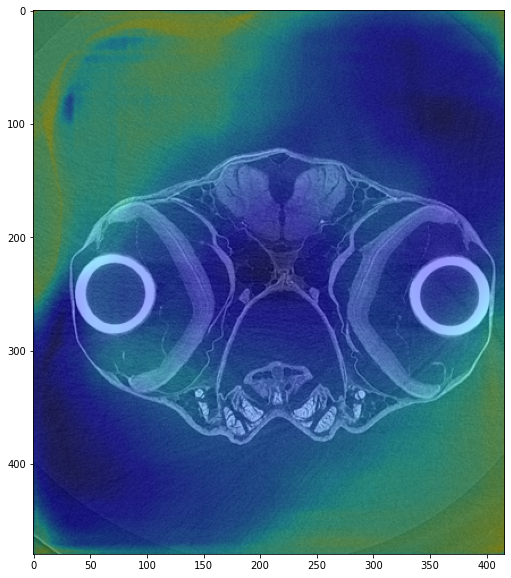

In [64]:
plt.figure(figsize=(16, 10))
plt.imshow(img[200], cmap='gray')
plt.imshow(dist, cmap='jet', alpha=0.4)
plt.show()